In [16]:

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('check_points/results.csv')
data = data[["run_name","dataset","cond_num","view_range","train_step","psnr","ssim","lpips"]]
data = data.drop_duplicates()

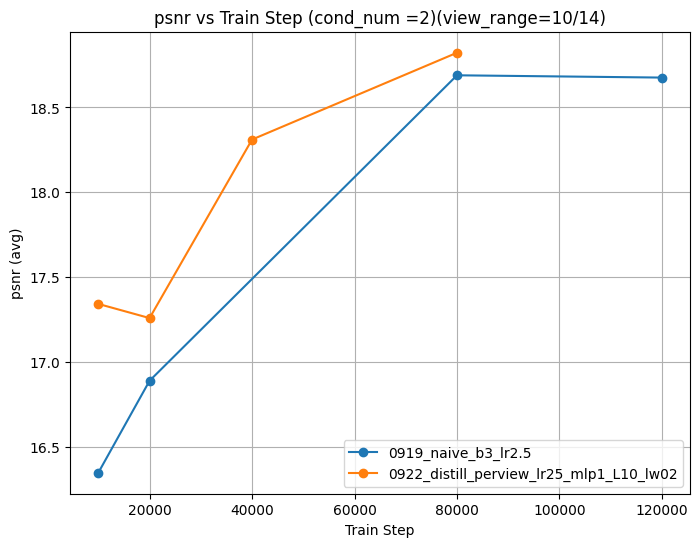

In [ ]:

value ="psnr"
df = data[(data["cond_num"] == 2) ] # & (data["view_range"] == 10)
# --- Group by run_name + train_step, average psnr ---
df_avg = df.groupby(["run_name", "train_step"])[value].mean().reset_index()

plt.figure(figsize=(8,6))
for run in df_avg["run_name"].unique():
    subset = df_avg[df_avg["run_name"] == run]
    plt.plot(subset["train_step"], subset[value], marker="o", label=run)

plt.xlabel("Train Step")
plt.ylabel(f"{value} (avg)")
plt.title(f"{value} vs Train Step (cond_num =2)(view_range=10/14)")
plt.legend()
plt.grid(True)
plt.show()